In [45]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plot
import random

In [46]:
data = pd.read_csv('heart.csv', index_col = 0)
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


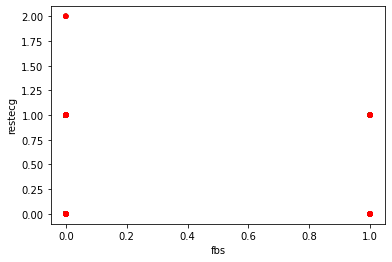

     sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
age                                                                          
48     1   1       130   245    0        0      180      0      0.2      1   
52     1   1       120   325    0        1      172      0      0.2      2   
69     0   3       140   239    0        1      151      0      1.8      2   
44     1   0       120   169    0        1      144      1      2.8      0   
44     0   2       108   141    0        1      175      0      0.6      1   
..   ...  ..       ...   ...  ...      ...      ...    ...      ...    ...   
53     0   0       138   234    0        0      160      0      0.0      2   
45     0   1       130   234    0        0      175      0      0.6      1   
34     0   1       118   210    0        1      192      0      0.7      2   
59     1   0       164   176    1        0       90      0      1.0      1   
49     1   2       118   149    0        0      126      0      

In [47]:
data1 = data.sample(frac = 1)
x = data1[['oldpeak','thal']].values.reshape([-1,2])
y = data1['target'].to_numpy()
#y = np.where(y <= 0, -1, 1)
x_train = x[:272]
y_train = y[:272]
x_test = x[272:]
y_test = y[272:]

color = data['target'].apply(lambda x: 'red' if x == 0 else 'green')
data.plot(kind='scatter', x='fbs', y='restecg', c=color)
plot.show()
np.array(x_train)
np.array(y_train)
print(data1)

In [48]:
data.corr()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


In [49]:
def predict(x, w, b):
    classification = np.dot(x, w) + b
    return classification

In [50]:
def cost_func(w, b, x, y):
    cf = y *(np.dot(x, w) + b)
    return cf
        

In [60]:
def fit(x, y, b):
    w = np.zeros(len(x[0])).reshape((1,2))
    wt = np.transpose(w)
    LR = 0.1
    lambda_df = 1 / 1000
    for i in range(1000):
        for j, x_term in enumerate(x):
            x_term1 = x_term.reshape((1,2))
            cost_f = cost_func(wt, b, x_term1, y[j])
            
            if cost_f >= 1:
                w -= LR * (2 * np.dot(lambda_df, w))
            else:
                w += LR * (np.dot(x_term1, y[j]) - 2 * np.dot(lambda_df, w))
                b += LR * y[j]
                
    return w, b

In [61]:
b = 0
Y_pred = np.zeros(31)
w , b= fit(x_train, y_train, b)
wt = np.transpose(w)
for j, x_term in enumerate(x_test):
    x_term1 = x_term.reshape((1,2))
    Y_pred[j] = np.round(predict(x_term1, wt, b))

error = 0
for i in range(31):
    if(Y_pred[i] != y_test[i]):
        error += 1

print((31-error)/31)

0.5483870967741935


[[1.10000008]
 [1.10000005]
 [1.10000005]
 [1.10000005]
 [1.10000005]
 [1.10000008]
 [1.1000001 ]
 [1.10000005]
 [1.10000005]
 [1.10000009]
 [1.10000002]
 [1.10000007]
 [1.10000008]
 [1.10000008]
 [1.10000006]
 [1.10000007]
 [1.1000001 ]
 [1.10000006]
 [1.10000008]
 [1.10000005]
 [1.1       ]
 [1.10000006]
 [1.10000008]
 [1.10000005]
 [1.10000006]
 [1.10000005]
 [1.10000005]
 [1.10000005]
 [1.10000005]
 [1.10000003]
 [1.10000005]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()